# Assignment 1 - Accessing the Census API and Mapping  Median Household Income

Before you start, you should have already installed Anaconda and `conda-forge`.

Make sure you have installed <a href="https://anaconda.org/conda-forge/cenpy">cenpy</a>, pandas, matplotlib, and contextily. Use `import` statements to import them all to this notebook.

<div class="alert alert-block alert-info">
<p>I've set this up as a partially autograded assignment. This is an experiment! So bear with me.</p>
 
<p>The points grading is mainly for you to see where you are going right and going wrong, and to tell me where to take a closer look. You won't be penalized just because your output doesn't match what the autograder expects.</p>
    
<p>In practice, I'll grade holistically rather than a question-by-question basis, using a check, check- and check+ scale.</p>
</div>

The variables available through the API <a href="https://api.census.gov/data/2019/acs/acs5/variables.html">are listed here in HTML form</a>. But you can also see what's available through `cenpy`. You can refer to the CenPy <a href="https://github.com/cenpy-devs/cenpy">documentation</a>. And check out this segregation <a href="https://nbviewer.jupyter.org/github/cenpy-devs/cenpy/blob/master/notebooks/segregation.ipynb">tutorial</a> for reference. 

Create a connection to the American Community Survey (as in the class notebook). Take 15 minutes to explore what variables and tables are available.

What tables have MEDIAN HOUSEHOLD INCOME? (Hint: use `filter_tables`.) Store the dataframe in the `income_tables` variable.

Hint: pandas tries to be helpful by truncating long columns. If you want to see the entire output, try:
```
import pandas as pd
pd.set_option('display.max_colwidth', None)
```

In [1]:
# You'll need a few lines of code that looks something like this
income_tables = 999 # replace 999 with your code here
print(income_tables)

### BEGIN SOLUTION
import cenpy
acs = cenpy.products.ACS()
income_tables = acs.filter_tables('MEDIAN HOUSEHOLD INCOME', by='description')
print(income_tables)

### END SOLUTION

999
                                                  description  \
table_name                                                      
B19013      MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...   
B19019      MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...   
B19049      MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...   
B22008      MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...   
B25099      MORTGAGE STATUS BY MEDIAN HOUSEHOLD INCOME IN ...   
B25119      MEDIAN HOUSEHOLD INCOME THE PAST 12 MONTHS (IN...   

                                                      columns  
table_name                                                     
B19013                                          [B19013_001E]  
B19019      [B19019_001E, B19019_002E, B19019_003E, B19019...  
B19049      [B19049_001E, B19049_002E, B19049_003E, B19049...  
B22008                [B22008_001E, B22008_002E, B22008_003E]  
B25099                [B25099_001E, B25099_002E, B25099_003E]  
B25119                [B251

In [2]:
# Autograding tests - do not edit
assert len(income_tables) == 6
assert 'B19013' in income_tables.index.values

Each of these tables includes one or more variables. 

For the first table in your answer above, what variables are included? Assign the dataframe of variables to the `income_variables` variable.

In [10]:
# You'll need a few lines of code that looks something like this
income_variables = 999 # replace 999 with your code here
print(income_variables)

### BEGIN SOLUTION
# there is only one variable, so it's simpler
# I know the instructions here were ambiguous, so lots of potential answers are OK
# This is the more literal correct answer
income_variables = income_tables.iloc[0]['columns'] # .iloc[0] gives the first row

# Alternatively, we can search on the table name
income_variables = acs.filter_variables('B19013') 
print(income_variables)

### END SOLUTION

999
                                                          label  \
B19013E_001E  Estimate!!Median household income in the past ...   
B19013D_001E  Estimate!!Median household income in the past ...   
B19013I_001E  Estimate!!Median household income in the past ...   
B19013A_001E  Estimate!!Median household income in the past ...   
B19013F_001E  Estimate!!Median household income in the past ...   
B19013G_001E  Estimate!!Median household income in the past ...   
B19013B_001E  Estimate!!Median household income in the past ...   
B19013C_001E  Estimate!!Median household income in the past ...   
B19013_001E   Estimate!!Median household income in the past ...   
B19013H_001E  Estimate!!Median household income in the past ...   

                                                        concept predicateType  \
B19013E_001E  MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...           int   
B19013D_001E  MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS ...           int   
B19013I_001E  M

In [11]:
# Autograding tests - do not edit
assert len(income_variables) == 10
assert 'B19013_001E' in income_variables.index.values

Identify the variable that gives you median household income for all individuals (i.e., not disaggregated by race and ethnicity).

Create a geodataframe with this variable for all census tracts in the City of Los Angeles. 
    Hint: <a href="http://cenpy-devs.github.io/cenpy/generated/cenpy.products.ACS.from_place.html">from_place</a>.

In [12]:
gdf = 999 # replace 999 with your code here
print(gdf)

### BEGIN SOLUTION
# B19013_001E would be fine too
gdf = acs.from_place('Los Angeles, CA', variables=['B19019_001E'])
print(gdf)
### END SOLUTION


999


/Users/adammb/anaconda3/envs/urbandatascience/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Matched: Los Angeles, CA to Los Angeles city within layer Incorporated Places
           GEOID                                           geometry  \
0    06037297202  POLYGON ((-13169477.480 3991598.870, -13169476...   
1    06037294510  POLYGON ((-13166314.000 4000710.020, -13166192...   
2    06037137301  POLYGON ((-13207313.860 4052077.620, -13207301...   
3    06037134520  POLYGON ((-13203142.830 4055825.340, -13202980...   
4    06037113101  POLYGON ((-13202181.250 4063428.730, -13202100...   
..           ...                                                ...   
744  06037203600  POLYGON ((-13159526.960 4036209.730, -13159523...   
745  06037199202  POLYGON ((-13159127.770 4039313.130, -13159112...   
746  06037199120  POLYGON ((-13158752.960 4037594.290, -13158654...   
747  06037183820  POLYGON ((-13158286.640 4042607.740, -13158283...   
748  06037199300  POLYGON ((-13159318.240 4040071.030, -13159308...   

     B19019_001E state county   tract  
0        66813.0    06    037

In [13]:
# Autograding tests - do not edit
assert len(gdf) == 749
assert list(gdf.columns)==['GEOID', 'geometry', 'B19019_001E', 'state', 'county','tract']

Some of the columns should be self explanatory (e.g. you should have a `state` column). Others might be less helpfully named. Rename the columns to something more intuitive.

What's the maximum of the tract-level median household income?

In [14]:
max_tract_income = 999 # replace 999 with your code here
print(max_tract_income)

### BEGIN SOLUTION
gdf.rename(columns={'B19019_001E':'median_HH_income'}, inplace=True)
max_tract_income = gdf.median_HH_income.max()
print('Maximum tract-level income: ${:,.0f}'.format(max_tract_income))
### END SOLUTION

999
Maximum tract-level income: $250,001


In [15]:
# Autograding tests - do not edit
assert max_tract_income == 250001

Spend a bit more time exploring the descriptive statistics (e.g., maximum and minimum median household income). Then plot the data on a map using `contextily` (follow the example from class).

Bonus: see if you can figure out some of the other `contextily` and plotting options, such as transparency (alpha), colormaps, zoom levels, and so on.

Bonus: export your map to a `.png` file.

In [16]:
import matplotlib.pyplot as plt
import contextily as ctx
# your code here

[Text(0.5, 1.0, '2019 Median Household Income in the City of LA (ACS 5-Year)')]

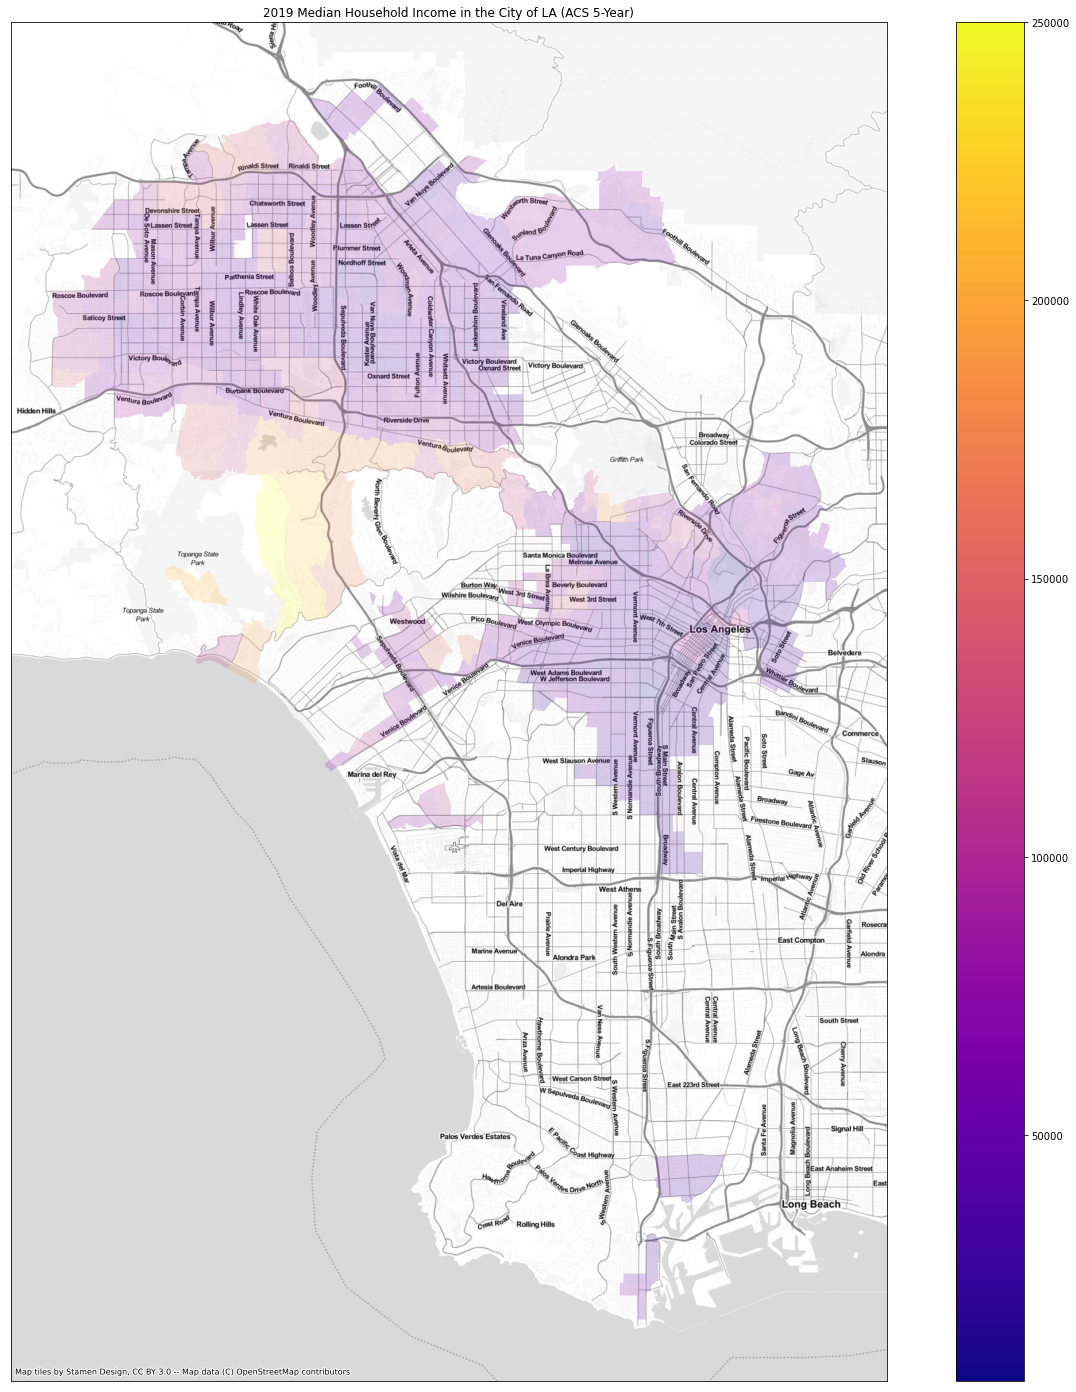

In [19]:
# suggested solution
# we'll talk a lot more about mapping and visualization as we go further, and explore the advanced options

import cenpy
import pandas as pd
import contextily as ctx
import matplotlib.pyplot as plt
%matplotlib inline


fig, ax = plt.subplots(1,1, figsize=(25,25))

# basemaps are typically in Web Mercator (projection 3857), so we need to reproject our dataframe to this
# alpha sets the transparency
gdf.to_crs('EPSG:3857').plot('median_HH_income', cmap='plasma', legend=True, ax = ax, alpha=.2)

# let's add a basemap using the contextily library
# a bell and whistle I added here was to use a different basemap, so that the income data are not overwhelmed
# see here for examples: https://contextily.readthedocs.io/en/latest/providers_deepdive.html
ctx.add_basemap(ax, zoom=12, source=ctx.providers.Stamen.TonerLite)

# and we really don't need the axis ticks and labels, so we set them to an empty list
ax.set_xticks([])
ax.set_yticks([])

ax.set(title='2019 Median Household Income in the City of LA (ACS 5-Year)')

# save to a file
fig.savefig('med_inc.png')

Final product should look something like this: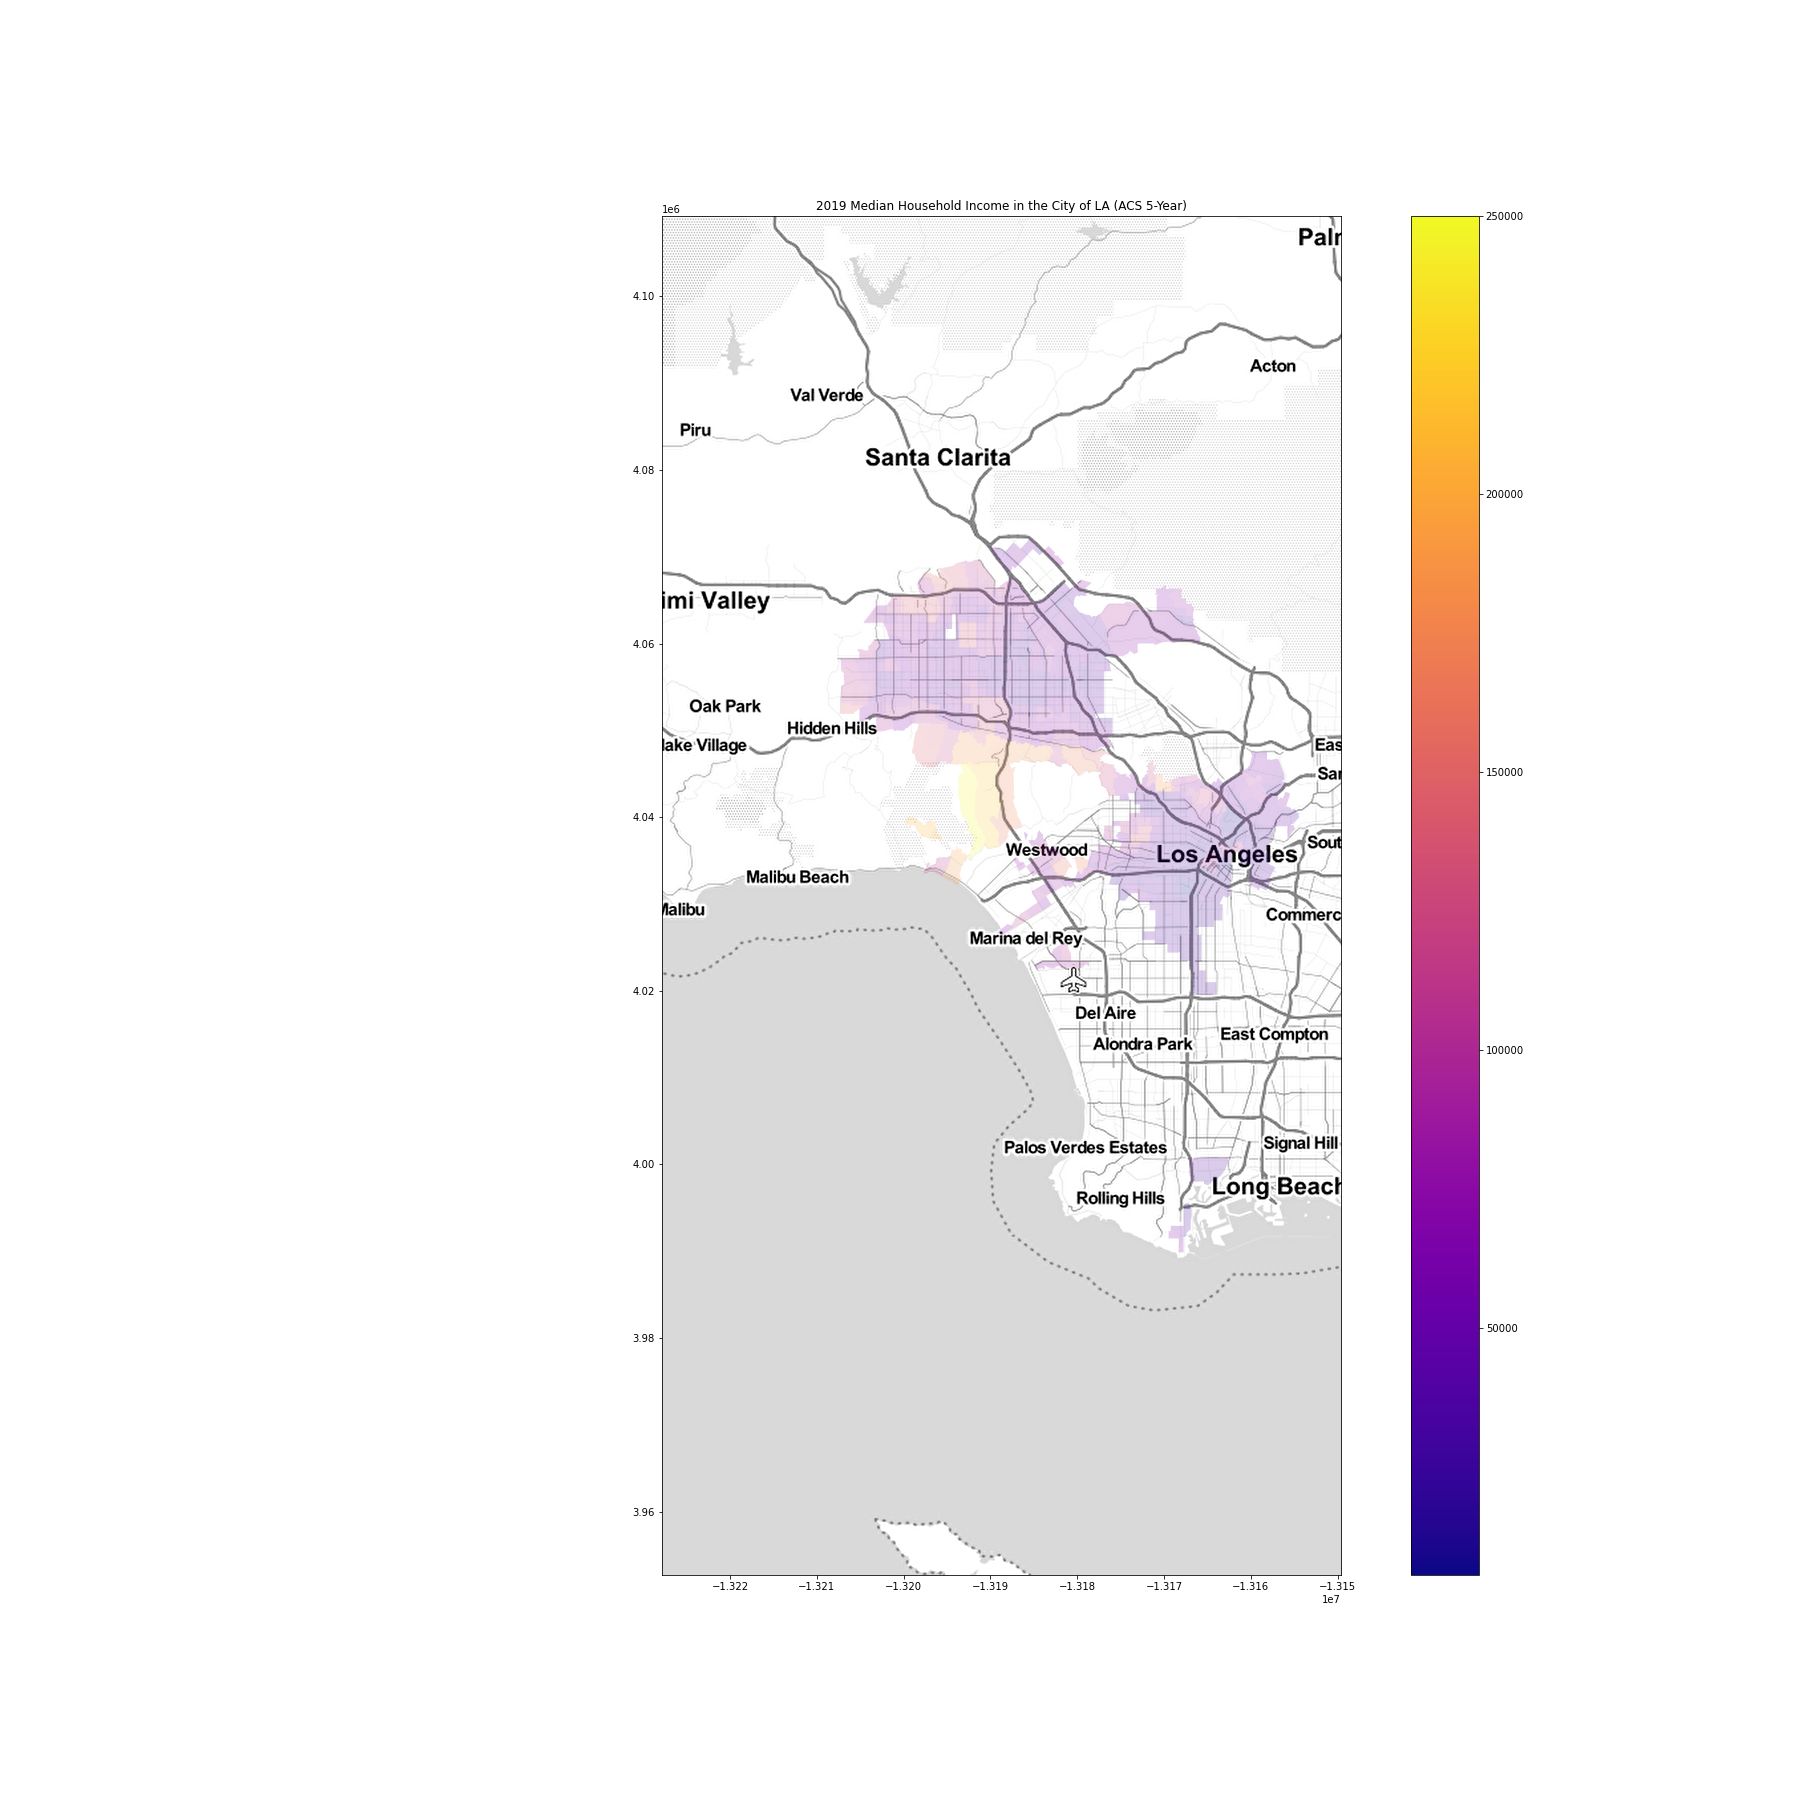